In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt=pd.read_csv('gld_price_data.csv')

In [3]:
dt

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
x=dt[['SPX','GLD','USO','SLV']]  #dt.iloc[:,1:5]
x

,SPX,GLD,USO,SLV
0,1447.160034,84.860001,78.470001,15.1800
1,1447.160034,85.570000,78.370003,15.2850
2,1411.630005,85.129997,77.309998,15.1670
3,1416.180054,84.769997,75.500000,15.0530
4,1390.189941,86.779999,76.059998,15.5900
...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100
2286,2697.790039,124.330002,14.370000,15.5300
2287,2723.070068,125.180000,14.410000,15.7400
2288,2730.129883,124.489998,14.380000,15.5600


In [5]:
y=dt[['EUR/USD']]
y

,EUR/USD
0,1.471692
1,1.474491
2,1.475492
3,1.468299
4,1.557099
...,...
2285,1.186789
2286,1.184722
2287,1.191753
2288,1.193118


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

              SPX         GLD        USO        SLV
251    682.549988   91.989998  26.559999  13.150000
1198  1636.359985  133.740005  34.330002  21.040001
33    1360.030029   93.239998  79.320000  17.700001
634   1221.530029  135.199997  37.770000  27.930000
629   1198.349976  134.179993  36.080002  26.940001
...           ...         ...        ...        ...
1226  1707.140015  125.699997  37.830002  19.010000
1410  1909.780029  121.199997  37.680000  18.280001
2251  2765.310059  125.779999  12.240000  15.610000
2188  2651.500000  118.480003  11.490000  14.960000
1750  2012.369995  103.110001  11.070000  13.300000

[1832 rows x 4 columns]
              SPX         GLD        USO        SLV
1130  1502.420044  152.619995  33.430000  27.730000
1898  2185.790039  127.669998  10.210000  18.959999
750   1314.550049  149.910004  39.520000  35.750000
1007  1365.000000  154.130005  32.599998  26.309999
1324  1819.199951  121.019997  32.810001  19.680000
...           ...         ...        ..

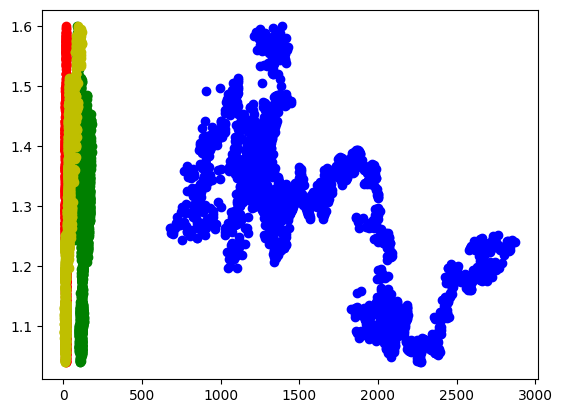

In [8]:
plt.scatter(x['GLD'],y,color='g')
plt.scatter(x['SLV'],y,color='r')
plt.scatter(x['SPX'],y,color='b')
plt.scatter(x['USO'],y,color='y')
plt.show()

## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(x_train,y_train)

LinearRegression()

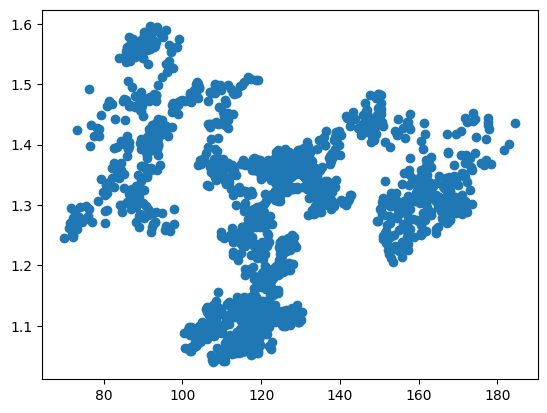

In [12]:
plt.scatter(x_train['GLD'],y_train)

In [13]:
lr.predict(x_test[0:10])

array([[1.31472043],
       [1.15332327],
       [1.39425308],
       [1.31042264],
       [1.27809216],
       [1.14497043],
       [1.27941997],
       [1.16069174],
       [1.17155217],
       [1.19589815]])

In [14]:
lr.score(x_test,y_test)

0.7554752997985863

In [15]:
lr.coef_

array([[-5.59779931e-05, -7.93199467e-04,  4.21570857e-03,
         5.13626434e-03]])

In [16]:
lr.intercept_

array([1.23652124])

In [17]:
lr.predict([[1426.660034,160.619995,32.240002,28.940001]])

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.31381392]])

In [18]:
print(lr.predict(x_test[0:5]))
print(y_test[0:5].values.flatten())

[[1.31472043]
 [1.15332327]
 [1.39425308]
 [1.31042264]
 [1.27809216]]
[1.327316 1.113908 1.434494 1.218027 1.367185]


## Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
pl=PolynomialFeatures(degree=3)

In [21]:
x_poly=pl.fit_transform(x)

In [22]:
pl.fit(x_poly,y)

PolynomialFeatures(degree=3)

In [23]:
reg=LinearRegression()

In [24]:
reg.fit(x_poly,y)

LinearRegression()

In [25]:
reg.predict(x_poly)

array([[1.46380049],
       [1.47439089],
       [1.46687915],
       ...,
       [1.20795243],
       [1.19439097],
       [1.16148663]])

In [27]:
reg.score(x_poly,y)

0.9307427681380898

## Desicion Tree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
reg = DecisionTreeRegressor(criterion='friedman_mse')

In [40]:
reg.fit(x_train,y_train) # The 'criterion' parameter of DecisionTreeRegressor must be a str among {'squared_error', 'poisson', 'friedman_mse', 'absolute_error'}

DecisionTreeRegressor(criterion='friedman_mse')

In [41]:
reg.score(x_test,y_test)

0.96667654994545

In [42]:
from sklearn import tree

[]

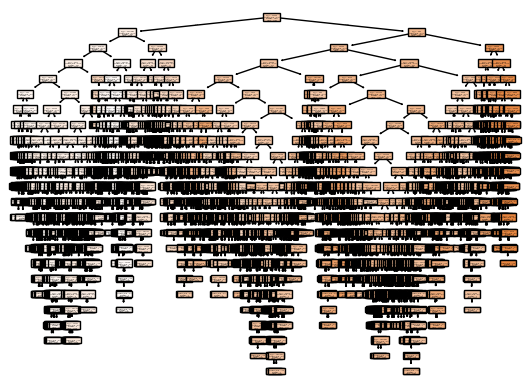

In [37]:
tree.plot_tree(reg,filled=True)
plt.plot()

## Random Forrest - Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
ranf=RandomForestRegressor(n_estimators=100,criterion='friedman_mse') #{'squared_error', 'poisson', 'friedman_mse', 'absolute_error'}

In [54]:
ranf.fit(x_train,y_train)

C:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='friedman_mse')

In [55]:
ranf.predict(x_test[0:5])

array([1.31400871, 1.11617604, 1.4342929 , 1.22591132, 1.36052189])

In [56]:
ranf.score(x_test,y_test)

0.9791131607188464

## Support Vector Regressor

In [57]:
from sklearn.svm import SVR

In [58]:
svr=SVR(kernel='rbf')

In [59]:
svr.fit(x_train,y_train)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [60]:
svr.predict(x_test[0:5])

array([1.34070949, 1.14628119, 1.36936101, 1.3521968 , 1.27786935])

In [61]:
svr.score(x_test,y_test)

0.7479336554935112

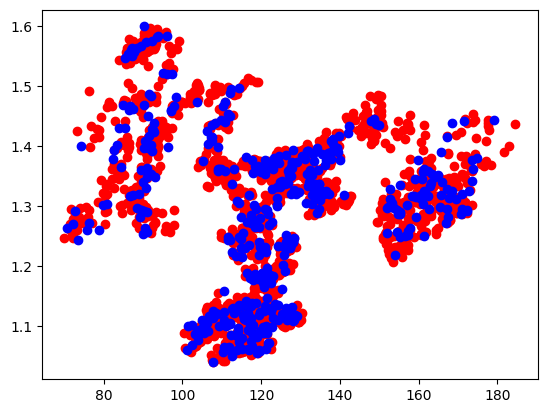

In [63]:
plt.scatter(x_train['GLD'],y_train,color='r')
plt.scatter(x_test['GLD'],y_test,color='b')